In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('wisc_bc_data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.shape

(569, 32)

#### Separate the input and output data

In [5]:
x=df.drop(['id','diagnosis'],axis=1)
y=df['diagnosis']

In [6]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
x.shape

(569, 30)

### Feature Selection

1.Filter Method for Feature Selection

In [8]:
from sklearn.feature_selection import SelectKBest,chi2

In [12]:
skf=SelectKBest(k=10,score_func=chi2)

In [13]:
skf.fit(x,y)

SelectKBest(score_func=<function chi2 at 0x000001D311956980>)

In [14]:
skf.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False])

In [18]:
x_new=x.iloc[:,skf.get_support()]
x_new

,radius_mean,texture_mean,perimeter_mean,area_mean,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,17.99,10.38,122.80,1001.0,8.589,153.40,25.380,17.33,184.60,2019.0
1,20.57,17.77,132.90,1326.0,3.398,74.08,24.990,23.41,158.80,1956.0
2,19.69,21.25,130.00,1203.0,4.585,94.03,23.570,25.53,152.50,1709.0
3,11.42,20.38,77.58,386.1,3.445,27.23,14.910,26.50,98.87,567.7
4,20.29,14.34,135.10,1297.0,5.438,94.44,22.540,16.67,152.20,1575.0
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,7.673,158.70,25.450,26.40,166.10,2027.0
565,20.13,28.25,131.20,1261.0,5.203,99.04,23.690,38.25,155.00,1731.0
566,16.60,28.08,108.30,858.1,3.425,48.55,18.980,34.12,126.70,1124.0
567,20.60,29.33,140.10,1265.0,5.772,86.22,25.740,39.42,184.60,1821.0


In [16]:
skf.get_feature_names_out()

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'], dtype=object)

#### Cross Validation

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,random_state=0)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((426, 10), (143, 10), (426,), (143,))

### Build the Random Forest model

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf=RandomForestClassifier(random_state=0)

In [24]:
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

### Prediction

In [25]:
y_pred=clf.predict(x_test)
y_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M'],
      dtype=object)

### Performance Evaluation

In [31]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

In [30]:
accuracy_score(y_test,y_pred)

0.965034965034965

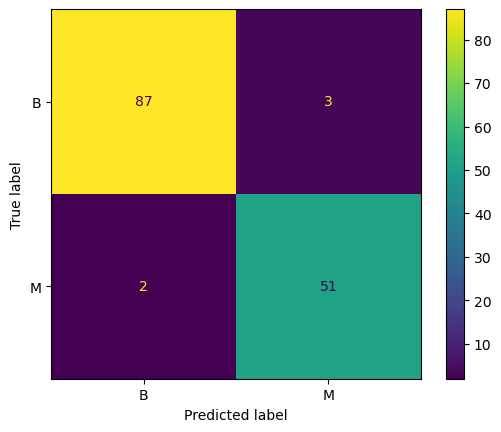

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)